In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/kmeans/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
df.shape

(200, 2)

In [5]:
import matplotlib.pyplot as plt

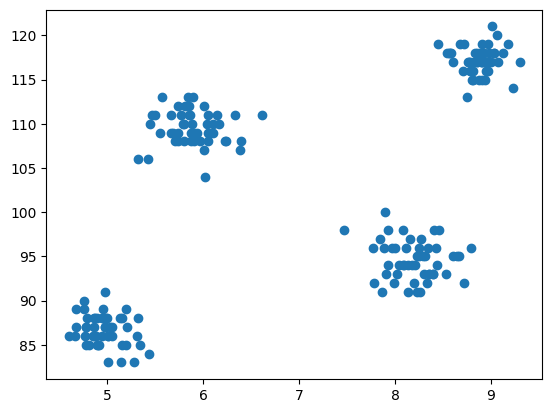

In [6]:
plt.scatter(df['cgpa'], df['iq'])

In [8]:
from sklearn.cluster import KMeans

## **Using Elbow Method to determine best value of `K`**

In [9]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters = i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [10]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 523.7131894763968,
 469.57533492242743,
 295.4391895943191,
 307.2942795973103,
 249.394137464929,
 214.14036592904995]

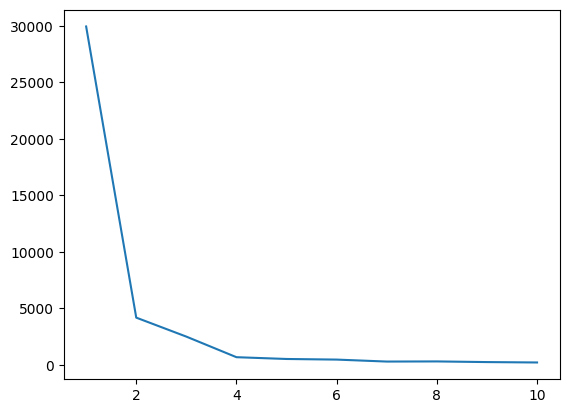

In [11]:
plt.plot(range(1, 11), wcss)



---
`4` the elbow point in the curve. So, 4 will be the best value of `k`.

---



In [13]:
# Applying KMeans CLustering

X = df.iloc[:, :].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [15]:
y_means

array([0, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0,
       1, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 3, 2, 1, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 2,
       1, 3, 0, 1, 1, 3, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 0, 1, 3,
       3, 1], dtype=int32)

In [17]:
# accessing members of 0th cluster
X[y_means == 0]

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ],
       [ 4.96, 88.  ],
       [ 4.86, 87.  ],
       [ 5.44, 84.  ],
       [ 5.34, 85.  ],
       [ 5.31, 86.  ],
       [ 5.14, 83.  ],
       [ 4.95, 86.  ],
       [ 5.21, 87.  ],
       [ 4.91, 85.  ],
       [ 5.28, 83.  ],
       [ 5.15, 88.  ],
       [ 4.9 , 85.  ],
       [ 4.89, 88.  ],
       [ 5.05, 86.  ],
       [ 4.98, 91.  ],
       [ 5.01, 86.  ],
       [ 4.95, 88.  ],
       [ 4.96, 89.  ],
       [ 4.85, 86.  ],
       [ 4.76, 90.  ],
       [ 4.98, 87.  ],
       [ 4.78, 87.  ],
       [ 5.2 , 85.  ],
       [ 5.05, 87.  ],
       [ 5.01, 83.  ],
       [ 4.77, 86.  ],
       [ 4.68, 87.  ],
       [ 4.81, 85.  ],
       [ 5.03, 87.  ],
       [ 4.98, 87.  ],
       [ 5.32, 88.  ],
       [ 4.86, 88.  ],
       [ 4.89, 85.  ],
       [ 4.88, 86.  ],
       [ 5.01, 86.  ],
       [ 4.67, 86.  ],
       [ 5.15, 85.  ],
       [ 4.97, 88.  ],
       [ 4.

In [18]:
# `iq` of 3rd cluster members
X[y_means == 3, 1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

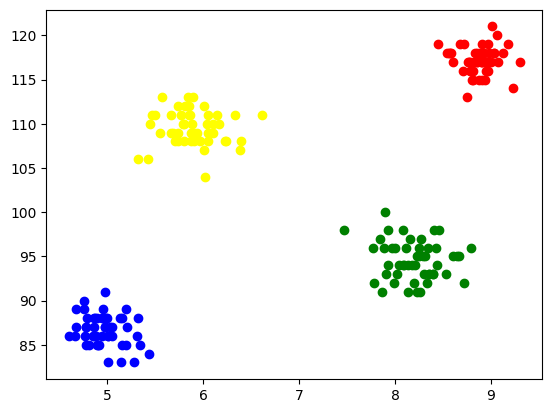

In [20]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# **KMeans on 3D Data**

In [21]:
from sklearn.datasets import make_blobs

In [22]:
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)


In [23]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [24]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [25]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

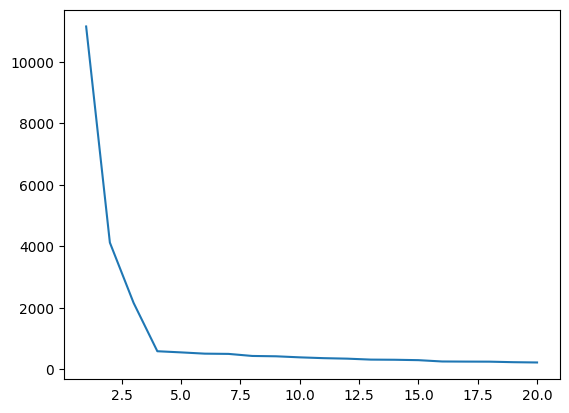

In [26]:
plt.plot(range(1,21),wcss)

In [27]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [28]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [29]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()